In [220]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv'

Boston = pd.read_csv(url)

In [221]:
Boston['logCrim'] =  np.log( Boston['crim'] )

Y = Boston['logCrim']

X = Boston['dis']

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3 , random_state=123)

In [223]:
from pygam import LinearGAM, GAM, s, f

In [224]:
gam_1 = GAM(s(0, n_splines=4, spline_order=3 , penalties='none' )).fit(X_train, Y_train)

# n_splines = k + spline_order = nº de betas (sin contar beta0)
# k + 1 = nº intervalos = n_splines - spline_order + 1 = 4 - 3 + 1 = 2 (en este caso)
# Los intervalos que supongo que se usan son:  [Q0, Q25),[Q25, Q50),[Q50, Q75),[Q75,Q100)

In [225]:
gam_1.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                         4.0
Link Function:                     IdentityLink Log Likelihood:                                  -660.1278
Number of Samples:                          354 AIC:                                             1330.2555
                                                AICc:                                             1330.428
                                                GCV:                                                2.0564
                                                Scale:                                              2.0147
                                                Pseudo R-Squared:                                   0.5516
Feature Function                  Lam

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17548\326973348.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_1.summary()


In [226]:
import matplotlib.pyplot as plt

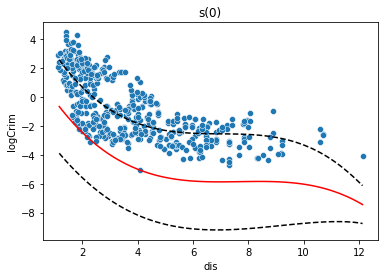

In [227]:
for i, term in enumerate(gam_1.terms):
    if term.isintercept:
        continue

    XX = gam_1.generate_X_grid(term=i)
    pdep, confi = gam_1.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

In [228]:
ECM_test_GAM_1 = sum(( Y_test - gam_1.predict(X_test) )**2) / len(Y_test)

In [229]:
ECM_test_GAM_1

2.0835966012179585

In [230]:
gam_1_penalizado = GAM(s(0, n_splines=4, spline_order=3 , lam=0.6 )).fit(X_train, Y_train)

In [231]:
gam_1_penalizado.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.1451
Link Function:                     IdentityLink Log Likelihood:                                  -711.2983
Number of Samples:                          354 AIC:                                             1428.8868
                                                AICc:                                            1428.9613
                                                GCV:                                                2.4505
                                                Scale:                                              2.4238
                                                Pseudo R-Squared:                                   0.4577
Feature Function                  Lam

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17548\4201017806.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_1_penalizado.summary()


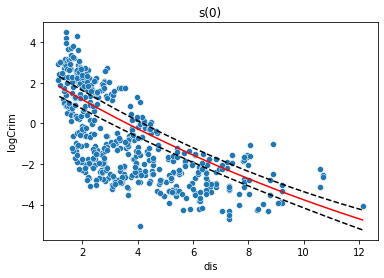

In [232]:
for i, term in enumerate(gam_1_penalizado.terms):
    if term.isintercept:
        continue

    XX = gam_1_penalizado.generate_X_grid(term=i)
    pdep, confi = gam_1_penalizado.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

In [233]:
ECM_test_GAM_1_penalizado = sum(( Y_test - gam_1_penalizado.predict(X_test) )**2) / len(Y_test)

In [234]:
ECM_test_GAM_1_penalizado

2.3755932909152495

In [235]:
gam_2 = GAM(s(0, n_splines=6, spline_order=3 , penalties='none')).fit(X_train, Y_train)

# n_splines = k + spline_order = nº de betas (sin contar beta0)
# k + 1 = nº intervalos = n_splines - spline_order + 1 = 6 - 3 + 1 = 4 (en este caso)
# Los intervalos que supongo que se usan son:  [Q0, Q25),[Q25, Q50),[Q50, Q75),[Q75,Q100)

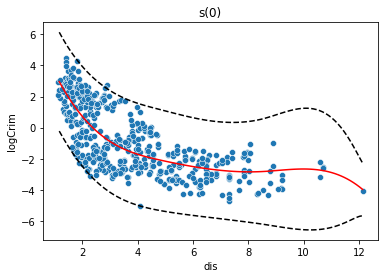

In [236]:
for i, term in enumerate(gam_2.terms):
    if term.isintercept:
        continue

    XX = gam_2.generate_X_grid(term=i)
    pdep, confi = gam_2.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

In [237]:
ECM_test_GAM_2 = sum(( Y_test - gam_2.predict(X_test) )**2) / len(Y_test)

In [238]:
ECM_test_GAM_2

2.0582018952364134

In [239]:
gam_2_penalizado = GAM(s(0, n_splines=6, spline_order=3 , lam=0.6 )).fit(X_train, Y_train)


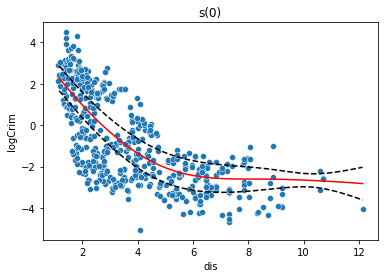

In [240]:
for i, term in enumerate(gam_2_penalizado.terms):
    if term.isintercept:
        continue

    XX = gam_2_penalizado.generate_X_grid(term=i)
    pdep, confi = gam_2_penalizado.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

In [241]:
ECM_test_GAM_2_penalizado = sum(( Y_test - gam_2_penalizado.predict(X_test) )**2) / len(Y_test)

In [242]:
ECM_test_GAM_2_penalizado

2.0803886687764868

In [243]:
gam_escalon = GAM(f(0)).fit(X_train, Y_train)

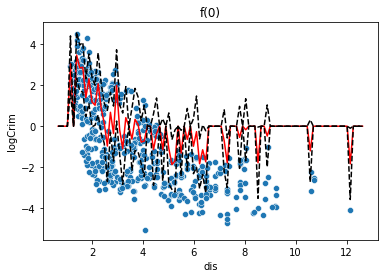

In [244]:
for i, term in enumerate(gam_escalon.terms):
    if term.isintercept:
        continue

    XX = gam_escalon.generate_X_grid(term=i)
    pdep, confi = gam_escalon.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

In [245]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

In [253]:
X_train_1 = PolynomialFeatures(degree=1).fit_transform(np.array(X_train).reshape(-1, 1))
X_train_2 = PolynomialFeatures(degree=2).fit_transform(np.array(X_train).reshape(-1, 1))
X_train_3 = PolynomialFeatures(degree=3).fit_transform(np.array(X_train).reshape(-1, 1))

In [254]:
X_train

273    4.3665
52     6.8147
181    2.5979
452    2.3682
381    1.5192
        ...  
98     3.4952
476    2.3053
322    4.7211
382    1.5804
365    1.6132
Name: dis, Length: 354, dtype: float64

In [257]:
X_train_2

array([[ 1.        ,  4.3665    , 19.06632225],
       [ 1.        ,  6.8147    , 46.44013609],
       [ 1.        ,  2.5979    ,  6.74908441],
       ...,
       [ 1.        ,  4.7211    , 22.28878521],
       [ 1.        ,  1.5804    ,  2.49766416],
       [ 1.        ,  1.6132    ,  2.60241424]])

In [256]:
X_train_3

array([[  1.        ,   4.3665    ,  19.06632225,  83.2530961 ],
       [  1.        ,   6.8147    ,  46.44013609, 316.47559541],
       [  1.        ,   2.5979    ,   6.74908441,  17.53344639],
       ...,
       [  1.        ,   4.7211    ,  22.28878521, 105.22758385],
       [  1.        ,   1.5804    ,   2.49766416,   3.94730844],
       [  1.        ,   1.6132    ,   2.60241424,   4.19821465]])

In [260]:
fit = sm.OLS(Y_train, X_train_3).fit()

In [261]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logCrim   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     143.5
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.22e-60
Time:                        13:03:40   Log-Likelihood:                -624.27
No. Observations:                 354   AIC:                             1257.
Df Residuals:                     350   BIC:                             1272.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9503      0.573     10.378      0.000       4.823       7.078
x1            -3.4311      0.400     -8.577      0.000      -4.218      -2.644
x2             0.4507      0.079      5.733      0.000       0.296       0.605
x3            -0.0196      0.005     -4.299      0.000      -0.029      -0.011
==============================================================================
Omnibus:                       18.688   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.762
Skew:                          -0.020   Prob(JB):                       0.0206
Kurtosis:                       2.276   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [276]:
X_test_3 = PolynomialFeatures(degree=3).fit_transform(np.array(X_test).reshape(-1, 1))

X_train_3 = PolynomialFeatures(degree=3).fit_transform(np.array(X_train).reshape(-1, 1))

In [266]:
ECM_polinomio_3 = sum( ( Y_test - fit.predict(X_test_3)  )**2 ) / len(Y_test)

In [267]:
ECM_polinomio_3

2.0835991159477256

In [279]:
Y_pred_train = fit.predict(X_train_3)

<AxesSubplot:xlabel='dis', ylabel='logCrim'>

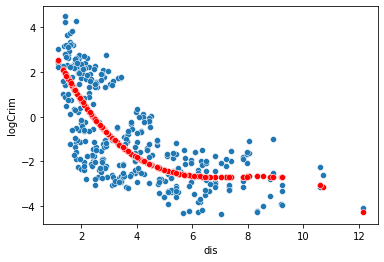

In [290]:
sns.scatterplot(x=X_train,y=Y_train)
sns.scatterplot(x=X_train, y=Y_pred_train , color='red')